# Numerical Approach

We use the minimization of a mean squared error function to calculate the linear regression model. 

The idea is to calculate the cost function (mse) and calculate the derivative of this function, the gradient, to understand how we can reduce this cost function. A pure numerical approach without any additional library to calculate any step. 


In [1]:
# Tradicional imports
import pandas as pd
import numpy as np

# To split the data set
from sklearn.model_selection import train_test_split

# Our functions. 
from utils import compute_cost, compute_gradient, gradient_descent

In [2]:
# Load the data
df = pd.read_csv('../data/linear_numeric_summarized.csv')

In [3]:
df.head()

,id,target,age,gender,A,B,C,D,E,F,G
0,1067163490,0,47,1,2.000000,4.333333,1.000000,1.333333,3.000000,3.000000,2.5
1,1073181139,2,60,1,3.333333,3.000000,3.333333,1.333333,3.333333,4.333333,3.0
2,1074271959,0,57,0,2.000000,4.666667,1.000000,1.000000,4.333333,2.000000,2.0
3,1074896711,0,74,0,2.333333,5.000000,1.000000,2.000000,4.333333,1.666667,2.5
4,1077476451,0,79,1,3.666667,5.000000,1.000000,2.000000,3.666667,1.666667,2.5


In [4]:
X = np.array(df.iloc[:, 4:])
y = np.array(df['target'])

In [5]:
m, n = X.shape

# Compute and display gradient with w and b initialized to zeros
w_init = np.zeros(n)
b_init = 0.

#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X, y, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.0788177339901477
dj_dw at initial w,b: 
 [-3.28571429 -3.44170772 -2.45977011 -1.48275862 -3.71592775 -3.38095238
 -2.31280788]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123456)

In [7]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# some gradient descent settings
iterations = 20000
alpha = 5.0e-5
# run gradient descent 
W_final, b_final, train_hist, test_hist, min_cost, min_cost_it = gradient_descent(X_train, 
                                                           y_train,
                                                           X_test, 
                                                           y_test, 
                                                           initial_w, 
                                                            initial_b,
                                                            compute_cost, 
                                                            compute_gradient,
                                                            alpha, 
                                                            iterations)

Iteration     0: Cost 1.78. TEST 1.32
Iteration  2000: Cost 1.22. TEST 0.77
Iteration  4000: Cost 1.18. TEST 0.75
Iteration  6000: Cost 1.16. TEST 0.73
Iteration  8000: Cost 1.14. TEST 0.72
Iteration 10000: Cost 1.13. TEST 0.72
Iteration 12000: Cost 1.11. TEST 0.71
Iteration 14000: Cost 1.11. TEST 0.71
Iteration 16000: Cost 1.10. TEST 0.71
Iteration 18000: Cost 1.09. TEST 0.71
Iteration 20000: Cost 1.09. TEST 0.71


In [10]:
min_cost, min_cost_it

(0.7096809018416782, 17657)

In [11]:
# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

In [12]:
# m,_ = X_train.shape
# m,_ = X_test.shape
# for i in range(m):
#     print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
#     print(f"prediction: {np.dot(X_test[i], w_final) + b_final:0.2f}, target value: {y_test[i]}")

In [13]:
print(f'Final cost: {compute_cost(X_test, y_test, W_final, b_final)}')

Final cost: 0.7100011733855793


In [14]:
import matplotlib.pyplot as plt

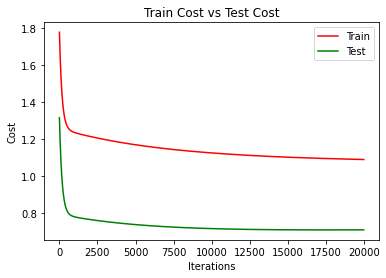

In [15]:
# train_hist, test_hist
fig, ax = plt.subplots()
ax.plot(train_hist, c='r', label='Train')
ax.plot(test_hist, c='g', label ='Test')
plt.title("Train Cost vs Test Cost")
plt.xlabel("Iterations"); 
plt.ylabel("Cost"); 
plt.legend()
plt.show()